# Siamak Hasanzadeh Barani
# UT assignment 1: Linear regression for Carprice prediction
# PART A: data preprocessing

# 1) imports & view data

In [1]:
from collections import Counter
import numpy as np; import pandas as pd
import matplotlib.pyplot as plt#; import matplotlib
from scipy import stats
df0 = pd.read_csv('F:\\My23Codes\\UT\\1 excell\\data\\CarPrice_Assignment.csv')
df0.drop(columns=['car_ID'], inplace=True); df=df0.copy(); cols = df.columns
display(len(cols),df.tail(2), df.columns)
X,y = df.loc[:, df.columns!='price'], df.loc[:, df.columns =='price']
df_original=df.copy()

25

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [2]:
col_value = df.corr().columns

wheelbase ((x-92)*1.2) , carlength (x**2),  carwidth,  carheight (no or (x-52)**2), curbweight((x-1500)**1.3), enginesize, boreratio(no or x**1.2), stroke, horsepower ((x)**1.2), citympg, highwaympg (x-45)**1.8

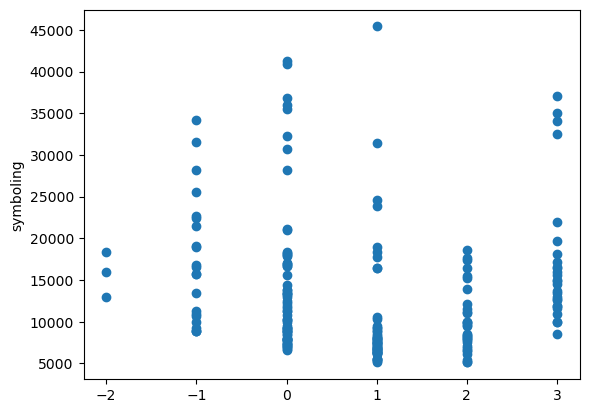

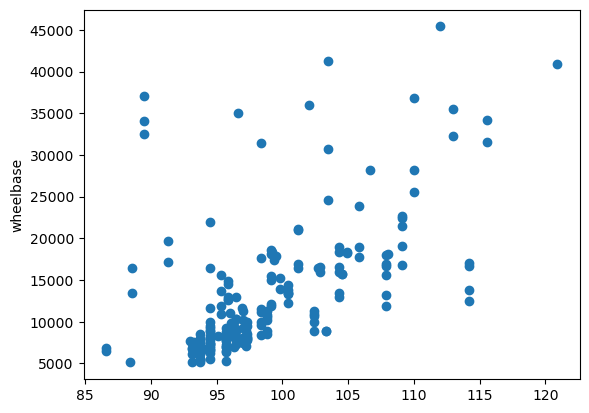

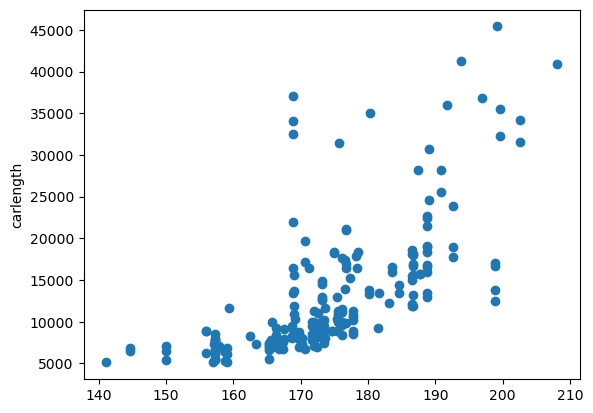

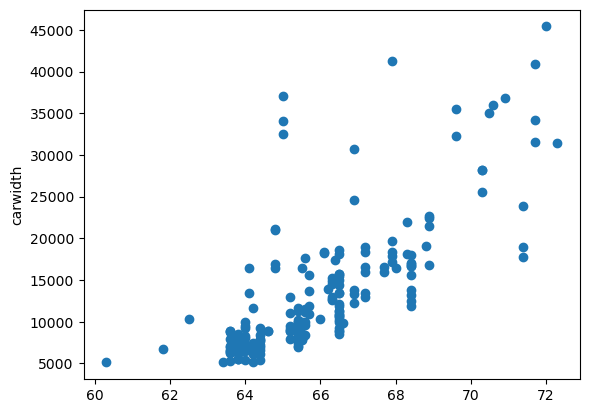

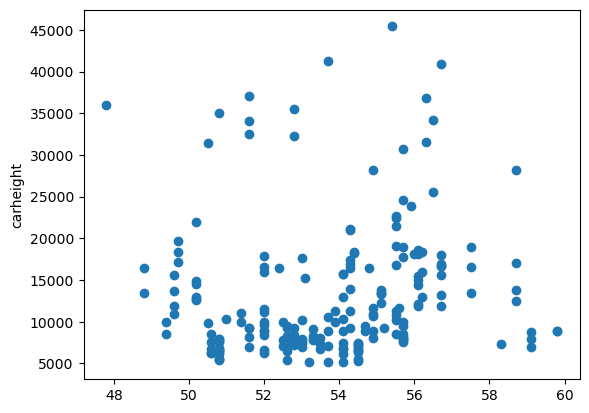

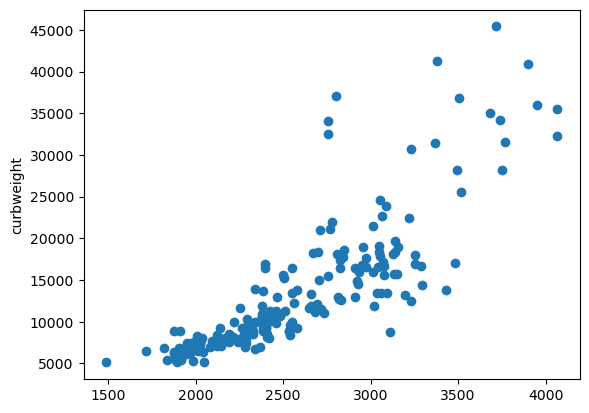

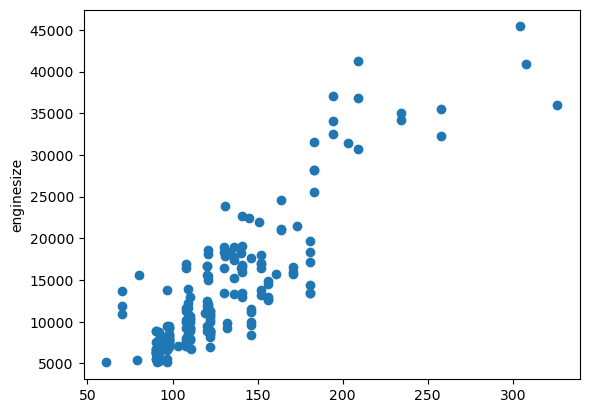

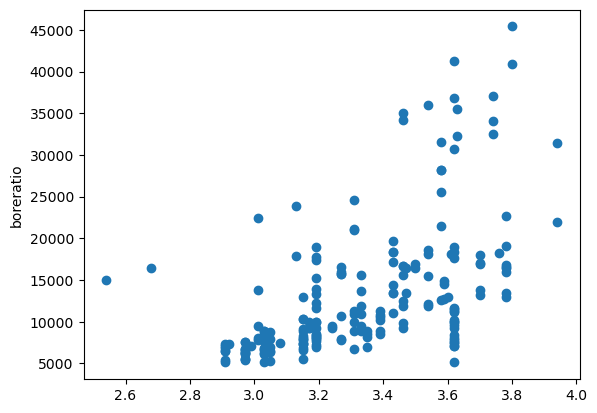

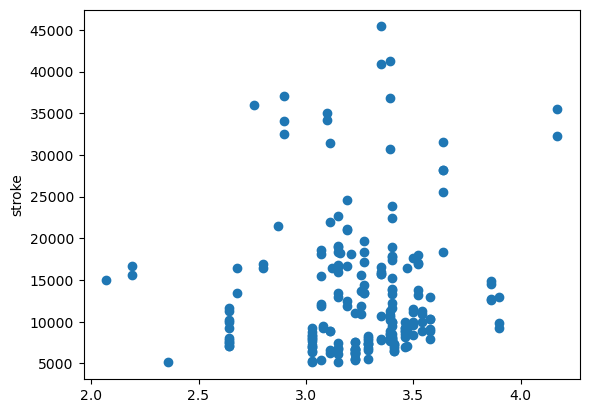

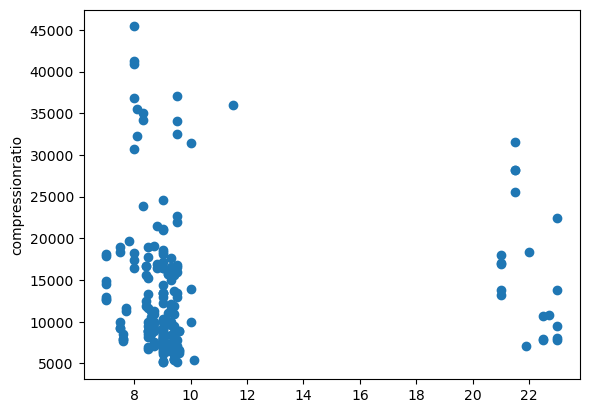

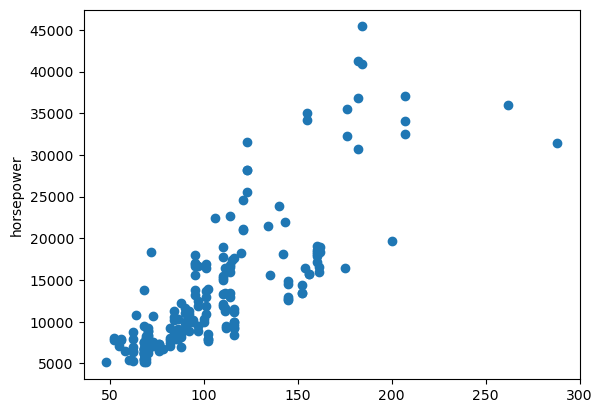

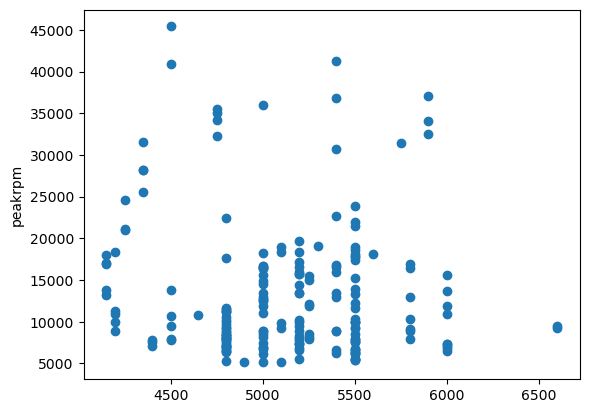

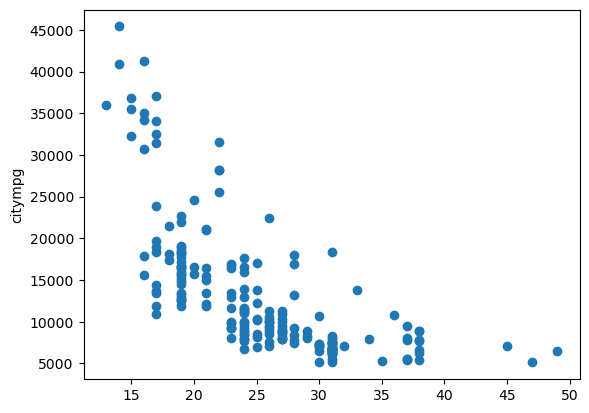

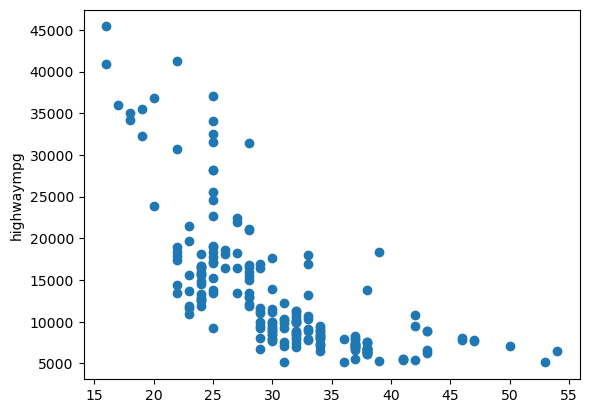

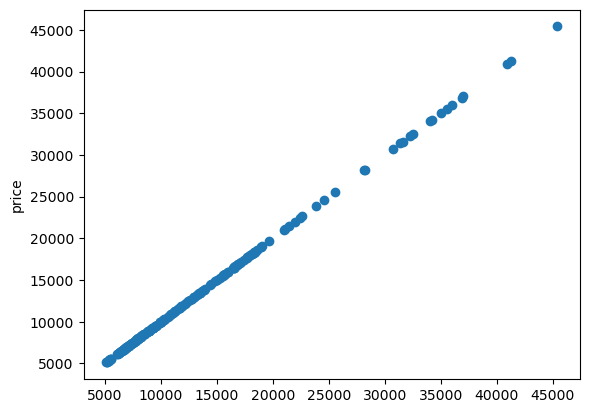

In [3]:
for col in col_value:
    plt.plot(df[col],y,"o");plt.ylabel(col);plt.show()

# 2) functions

In [4]:
# 1.1) functions 1

def view_cat(col, df=df, show_median=False):   # short view of categorial features
    print(col, Counter(df[col]))
    price_col = df.groupby(col)['price']
    print(price_col.mean().round(2))
    if show_median: print(price_col.median().round(2))
    return

# for categorial
def impute_cat_mean(col, df=df):
    gb=df.groupby(col)
    mean_values = gb["price"].transform('mean')
    df[col]=mean_values
    return df


def outlier_handling1(col, df=df):
    Q1, Q3 = df[col].describe()[[4,6]]; IQR=Q3-Q1
    LB, HB = min(0, Q1 - 1.5*IQR), Q1 + 1.5*IQR
    # handlin outlier_L
    df.loc[(df[col]<LB) , col]= LB
    # handling outlier_H (divided by median!! for not loosing much data)
    median_outlier_H = df[df[col]>HB][col].median()
    df.loc[(df[col]>HB) & (df[col] <= median_outlier_H), col]= HB
    df.loc[(df[col]>median_outlier_H), col] = 0.4* median_outlier_H + 0.6*HB
    return df


In [5]:
# 2.2) outlier hanling (must be ececuted once! & before calling functions 2) 
# price outlier hanling is done just for output and must be executed just once!
outlier_handling1('price')

# decision boundries mus be calculated after outlier handling
decision_boundries = df['price'].describe([0.2,0.4,0.6, 0.8])[[4,5,7,8]]; db=decision_boundries.copy() # must after outlier
imputed_values = df['price'].describe([0.1,0.3,0.7, 0.9])[[4,5,6,7,8]]; iv=imputed_values.copy()

In [6]:
# 2.3) functions 2

# functions 2 (must be after outlier handling ==== db&iv changed)
decision_boundries = df['price'].describe([0.2,0.4,0.6, 0.8])[[4,5,7,8]]; db=decision_boundries.round(3)# must after outlier
imputed_values = df['price'].describe([0.1,0.3,0.7, 0.9])[[4,5,6,7,8]]; iv=imputed_values.round(3)
def cat_encod_Anni(col, df=df):  
    gb_p = df.groupby(col)['price']
    df.loc[gb_p.transform(lambda x: x.mean()   < db[0]), col] = iv[0]
    df.loc[gb_p.transform(lambda x: (x.mean() >= db[0]) & (x.mean() <db[1])), col] = iv[1]
    df.loc[gb_p.transform(lambda x: (x.mean() >= db[1]) & (x.mean() <db[2])), col] = iv[2] 
    df.loc[gb_p.transform(lambda x: (x.mean() >= db[2]) & (x.mean() <db[3])), col] = iv[3] 
    df.loc[gb_p.transform(lambda x: x.mean() >= db[3] ), col] = iv[4]
    df[col] = df[col].apply(pd.to_numeric) # handl error : dtype object==>numeric
    return df
#note: it is not good idea to apply cat_encod_Anni to many cols with many categories, but I did it to see what happens

# 3) feature engineering
Data is clean without null you may check by df.info() command. outlier handling must be done before feature selection but in order to make it faster (not work on unnecessary coloumns) we will first work on feature selection. 
since there are many featues we start with fast imputation we will work more on them to improve in order not to allocate much time on irrelevant features

In [7]:
# 1) drop unbalamced features: 'fueltype', 'aspiration', 'enginelocation', 'cylindernumber'
col = 'fueltype'; Counter(df[col]); df.drop(col, axis=1, inplace=True)
col = 'aspiration'; Counter(df[col]); df.drop(col, axis=1, inplace=True)
col = 'enginelocation'; Counter(df[col]); df.drop(col, axis=1, inplace=True)
col = 'cylindernumber'; Counter(df[col]); df.drop(col, axis=1, inplace=True)



In [8]:
# 2)  'symboling'
col = 'symboling'

# merge cols & view
df.loc[df[col]==-2,col]=-1 # low data   # u may come back and handle one by one if selectd
#df.loc[df[col]==2,col]=1   # similiar
df.loc[df[col]==-1,col]=3
view_cat(col,df)

# impute
df = impute_cat_mean(col)
df.corrwith(df["price"])['symboling']

symboling Counter({0: 67, 1: 54, 3: 52, 2: 32})
symboling
0    13026.28
1     9342.67
2    10109.28
3    15819.89
Name: price, dtype: float64


0.4528964736874433

In [9]:
# 3)  'CarName'  ==> potential first feature
col="CarName"
cat_encod_Anni(col)
df.corrwith(df["price"])[col]


0.9243593273853468

In [10]:
# 4) doornumber
col='doornumber'; Counter(df[col])
impute_cat_mean(col)
df.corrwith(df["price"])[col]


0.07656690654924024

In [11]:
# 5) carbody
col='carbody'; Counter(df[col])
view_cat(col,df)
df.loc[df[col]=='convertible',col]='hardtop' # ==> more balanced
df = impute_cat_mean(col)
df.corrwith(df["price"])[col]

carbody Counter({'sedan': 96, 'hatchback': 70, 'wagon': 25, 'hardtop': 8, 'convertible': 6})
carbody
convertible    18248.63
hardtop        16718.21
hatchback      10209.55
sedan          13162.29
wagon          12076.46
Name: price, dtype: float64


0.3407478312082801

In [12]:
# 6) drivewheel
col='drivewheel'; Counter(df[col])
view_cat(col,df)
df.loc[df[col]=='4wd',col]='fwd' # ==> more balanced
df = impute_cat_mean(col)
df.corrwith(df["price"])[col]

drivewheel Counter({'fwd': 120, 'rwd': 76, '4wd': 9})
drivewheel
4wd    11087.46
fwd     9214.19
rwd    17340.88
Name: price, dtype: float64


0.6931372439521901

In [13]:
#7) wheelbase
col='wheelbase'; Counter(df[col])
cat_encod_Anni(col)
df.corrwith(df["price"])[col]

0.9049333446939627

In [14]:
#8) carlength
col='carlength'; Counter(df[col])
cat_encod_Anni(col)
df.corrwith(df["price"])[col]

0.9164409649415372

In [15]:
#9) carwidth
col='carwidth'; Counter(df[col])
cat_encod_Anni(col)
view_cat(col,df)
df.corrwith(df["price"])[col]


carwidth Counter({6657.0: 57, 10295.0: 47, 15458.0: 38, 20860.5: 37, 8022.0: 26})
carwidth
6657.0      7105.88
8022.0      8623.88
10295.0    11260.68
15458.0    15134.34
20860.5    21345.51
Name: price, dtype: float64


0.9074260061366025

In [16]:
#10) carheight
col='carheight'; Counter(df[col])
cat_encod_Anni(col)
view_cat(col,df)
df.corrwith(df["price"])[col]

carheight Counter({15458.0: 77, 10295.0: 62, 8022.0: 33, 6657.0: 20, 20860.5: 13})
carheight
6657.0      6812.95
8022.0      8049.89
10295.0    10801.94
15458.0    15251.91
20860.5    21336.46
Name: price, dtype: float64


0.6925354187156962

In [17]:
#11) curbweight
col='curbweight'; Counter(df[col])
cat_encod_Anni(col)
view_cat(col,df)
df.corrwith(df["price"])[col]


curbweight Counter({10295.0: 46, 15458.0: 41, 8022.0: 41, 20860.5: 39, 6657.0: 38})
curbweight
6657.0      6454.29
8022.0      8053.63
10295.0    10525.98
15458.0    15333.79
20860.5    21411.65
Name: price, dtype: float64


0.9537898644114798

In [18]:
#12) enginetype
col='enginetype'; Counter(df[col])
view_cat(col,df)
df.loc[df[col]=='dohcv',col]='ohcv'  # more balanced
cat_encod_Anni(col)
df.corrwith(df["price"])[col]

enginetype Counter({'ohc': 148, 'ohcf': 15, 'ohcv': 13, 'dohc': 12, 'l': 12, 'rotor': 4, 'dohcv': 1})
enginetype
dohc     16652.48
dohcv    20860.50
l        14627.58
ohc      11064.97
ohcf     11856.28
ohcv     19972.04
rotor    13020.00
Name: price, dtype: float64


0.4525213669331208

In [19]:
#13) enginesize
col='enginesize'; Counter(df[col])
cat_encod_Anni(col)
view_cat(col,df)
df.corrwith(df["price"])[col]

enginesize Counter({10295.0: 60, 15458.0: 53, 6657.0: 36, 20860.5: 28, 8022.0: 28})
enginesize
6657.0      6663.36
8022.0      7993.25
10295.0    10091.93
15458.0    15528.24
20860.5    22542.58
Name: price, dtype: float64


0.922443038510418

In [20]:
#14) fuelsystem
col='fuelsystem'; Counter(df[col])
df.loc[df[col]=='4bbl',col]= 'spdi'  # more balanced
df.loc[df[col]=='spfi',col]= 'spdi'  # more balanced
df.loc[df[col]=='mfi',col] = 'spdi'  # more balanced
df.loc[df[col]=='1bbl',col]= '2bbl'  # more balanced
cat_encod_Anni(col)
view_cat(col,df)
df.corrwith(df["price"])[col]

fuelsystem Counter({15458.0: 114, 8022.0: 77, 10295.0: 14})
fuelsystem
8022.0      7489.21
10295.0    11382.93
15458.0    15678.66
Name: price, dtype: float64


0.6945912863190014

In [21]:
#15) boreratio
col='boreratio'; Counter(df[col])
cat_encod_Anni(col)
view_cat(col,df)
df.corrwith(df["price"])[col]

boreratio Counter({10295.0: 65, 15458.0: 61, 6657.0: 39, 8022.0: 21, 20860.5: 19})
boreratio
6657.0      6806.95
8022.0      8263.10
10295.0    11360.92
15458.0    15279.81
20860.5    21782.78
Name: price, dtype: float64


0.7696154601518203

In [22]:
#16) stroke
col='stroke'; Counter(df[col])
cat_encod_Anni(col)
view_cat(col,df)
df.corrwith(df["price"])[col]

stroke Counter({15458.0: 95, 6657.0: 44, 10295.0: 31, 8022.0: 19, 20860.5: 16})
stroke
6657.0      7028.57
8022.0      8811.21
10295.0    10790.55
15458.0    14189.01
20860.5    22766.48
Name: price, dtype: float64


0.7320891868576178

In [23]:
#17) compressionratio
col='compressionratio'; Counter(df[col])
df.loc[df[col]==6657.0,col] = 8022.0  # more balanced
cat_encod_Anni(col)
view_cat(col,df)
df.corrwith(df["price"])[col]

compressionratio Counter({10295.0: 92, 15458.0: 49, 8022.0: 38, 20860.5: 23, 6657.0: 3})
compressionratio
6657.0      6023.33
8022.0      7976.05
10295.0    10641.74
15458.0    14759.98
20860.5    21737.30
Name: price, dtype: float64


0.7280824191906264

In [24]:
#18) horsepower
col='horsepower'; Counter(df[col])
cat_encod_Anni(col)
view_cat(col,df)
df.corrwith(df["price"])[col]

horsepower Counter({15458.0: 47, 6657.0: 45, 10295.0: 40, 20860.5: 37, 8022.0: 36})
horsepower
6657.0      6898.58
8022.0      8264.25
10295.0    10375.98
15458.0    14945.84
20860.5    21566.33
Name: price, dtype: float64


0.9313831288066291

In [25]:
#19) peakrpm
col='peakrpm'; Counter(df[col])
cat_encod_Anni(col)
view_cat(col,df)
df.corrwith(df["price"])[col]

peakrpm Counter({10295.0: 159, 15458.0: 25, 20860.5: 17, 8022.0: 3, 6657.0: 1})
peakrpm
6657.0      5118.00
8022.0      7477.00
10295.0    10908.17
15458.0    15091.94
20860.5    22597.04
Name: price, dtype: float64


0.6113330854273331

In [26]:
#20) citympg
col='citympg'; Counter(df[col])
cat_encod_Anni(col)
view_cat(col,df)
df.corrwith(df["price"])[col]

citympg Counter({10295.0: 76, 6657.0: 54, 15458.0: 36, 20860.5: 35, 8022.0: 4})
citympg
6657.0      7137.65
8022.0      8285.50
10295.0    10693.95
15458.0    15998.06
20860.5    20461.47
Name: price, dtype: float64


0.8421904933385862

In [27]:
#21) highwaympg
col='highwaympg'; Counter(df[col])
z=cat_encod_Anni(col)
view_cat(col,df)
df.corrwith(df["price"])[col]

highwaympg Counter({10295.0: 53, 20860.5: 44, 6657.0: 38, 15458.0: 37, 8022.0: 33})
highwaympg
6657.0      6906.58
8022.0      8297.97
10295.0    10330.38
15458.0    15217.14
20860.5    19922.04
Name: price, dtype: float64


0.860166552251258

In [28]:
#df.to_csv(r'F:\My23Codes\UT\1 excell\data\Sia_CarPrice_cleaned_19July0002.xlsx' ,index=False)

In [29]:
#  Part B) work on cleaned data
# UT assignment 1 :  Linear regression on carprice dataset


# Part B) table of contents
0) import 
1) initializing constant values & got insight to data (correlations & head)
2) functions 
3) 3.A)        Feature selection & linear regression     3.B) reports    3.c) compare with ols
4) 4.A) compare sklearn with ols from statsmodels.api    4.B) comparing my approach with filtering with correlation
5) 5.A) robust Feature selection & linear regression     5.B) reports
6) 6.A) featue extraction with PCA                       6.B) reports
7) conclusion 


# 0) import

In [30]:
# 0) import
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import statsmodels.api as sm

from scipy import stats;

import numpy as np; import pandas as pd
import matplotlib.pyplot as plt; import seaborn as sns

from sklearn import decomposition
from sklearn import svm
from collections import Counter
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler 

X = df.loc[:,df.columns != "price"]; y = df["price"]; 
df = pd.concat([X,y], axis=1); df0=df.copy(); cols=df.columns;         # last col of df ==> y
col_1digit_types = [col for col in cols if len(Counter(df[col]))<10]; df_robust=df[col_1digit_types].copy()


# 1) initializing & insight to data 

In [31]:
# initial values to avoid error
#vif4, vif5, vif6, vif7 = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
#vif1, vif2, vif3, vif3_filter = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

# constant values
n,p = len(X), len(X.iloc[0])                         # needed for calculating adjusted R2

# dive insight to data
print(X.corrwith(y).nlargest(7).round(3)); df.head(3)

curbweight    0.954
horsepower    0.931
CarName       0.924
enginesize    0.922
carlength     0.916
carwidth      0.907
wheelbase     0.905
dtype: float64


,symboling,CarName,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,15819.892308,15458.0,11827.005189,17374.107143,17340.884211,15458.0,15458.0,15458.0,15458.0,15458.0,...,15458.0,15458.0,15458.0,15458.0,10295.0,15458.0,10295.0,15458.0,20860.5,13495.0
1,15819.892308,15458.0,11827.005189,17374.107143,17340.884211,15458.0,15458.0,15458.0,15458.0,15458.0,...,15458.0,15458.0,15458.0,15458.0,10295.0,15458.0,10295.0,15458.0,20860.5,16500.0
2,9342.674074,15458.0,11827.005189,10209.545243,17340.884211,8022.0,15458.0,10295.0,15458.0,15458.0,...,15458.0,15458.0,15458.0,10295.0,10295.0,15458.0,10295.0,15458.0,20860.5,16500.0


# 2) functions
1) spilit_scale:
to split and scale data using sklearn

2) MAPE: 
relative error: the ratio of the absolute error of a measurement to the measurement being taken
MAPE1: is a mesure of fitness calculated by: 1 - relative error 
MAPE2: to calculate mean_absolute_percentage_error from sklearn

3) Linear_Reg:
linear regression of Sklearn + MAPE + Adjusted R2 + return training Residual

4) feasture_selection_Sia   ==> feature selection (Sia approach)
an innovative approach to select features based on correlation (correlation of residuals with VIF check)


In [32]:
# 2) functions
test_size=0.2
def spilit_scale(df, test_size=0.2, scale_method = 'Standard' ): # scaling function the let u select features
    x, y = df.iloc[:,:-1], df.iloc[:,-1]
    # split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0) 
    
    # scale
    sc_x1, sc_x2, sc_x3  = StandardScaler(),MinMaxScaler(), RobustScaler()
    col_name=df.columns[:-1]
    X_train1 = pd.DataFrame(sc_x1.fit_transform(X_train), columns=col_name)
    X_train2 = pd.DataFrame(sc_x2.fit_transform(X_train), columns=col_name) 
    X_train3 = pd.DataFrame(sc_x3.fit_transform(X_train), columns=col_name) 
    X_test1 = pd.DataFrame(sc_x1.transform(X_test), columns=col_name)
    X_test2 = pd.DataFrame(sc_x2.transform(X_test), columns=col_name)
    X_test3 = pd.DataFrame(sc_x3.transform(X_test), columns=col_name)
    if scale_method == 'Standard' or scale_method == 'S':
        return X_train1, X_test1, y_train, y_test    # StandardScaler()   note: X_train1 is np (not pd)   
    elif scale_method == 'Robust'  or scale_method == 'R':
        return X_train3, X_test3, y_train, y_test    # RobustScaler()      # (x-q1)/(q3-q1)
    else:
        return X_train2, X_test2, y_train, y_test    # MinMaxScaler()
# X_tr, X_te, y_tr, y_te = spilit_scale(df)

def MAPE(y, y_pred):
    MAPE1 = round(np.mean(1-abs((y-y_pred)/y)),3)
    MAPE2 = 100 - np.mean(mean_absolute_percentage_error(y,y_pred))  # fek konam be dard nmikhre!!!
    return MAPE1#, MAPE2

def Linear_Reg(X_train, X_test, y_train, y_test):
    LR = LinearRegression(); LR.fit(X_train, y_train)                                       # model
    p_train, p_test =LR.predict(X_train), LR.predict(X_test)                                # Predict  
    res = LR.predict(X_train)- y_train; print("Mean Absoulut Residuals", np.mean(abs(res))) # res
    # evaluate & results
    MAPE_train, MAPE_test = MAPE(y_train, p_train ), MAPE(y_test, p_test); 
    print("MAPE for training & test sets are as follow:\t", MAPE_train, MAPE_test)
    R2_tr, R2_te = LR.score(X_train, y_train).round(5), LR.score(X_test, y_test).round(5)
    n,p = len(X_test), len(X_test.iloc[0])
    Adjusted_R2_tr =1-(1-R2_tr)*(n-1)/(n-1-p); Adj_R2_tr = np.round(Adjusted_R2_tr, 3) #adjusted_R2 = 1-(1-R2)*(n-1)/(n-1-p)
    Adjusted_R2_te =1-(1-R2_te)*(n-1)/(n-1-p); Adj_R2_te = np.round(Adjusted_R2_te, 3)
    print("R2 train:", R2_tr, "\t R2 test:", R2_te, "\t Adjusted R2 train: ", Adj_R2_tr, "\t Adjusted R2 test: ", Adj_R2_te)
    print('Intercept: ', LR.intercept_.round(2),"\t"*2, 'Coefficients: ', LR.coef_.round(2), "\t"*2);
    #print(1-(1-r2_score(y_test, p_test))*((len(X_test)-1)/(len(X_test)-len(X_test)-1)))
   
   
    
    return res

def feasture_selection_Sia(df_selected, df=df, res=y, plotr=False, vif_=False):  # global X contains all features
    X = df.loc[:,df.columns != "price"]
    corr_residual = max(abs(X.corrwith(res).round(2)))
    idx_col = abs(X.corrwith(res).round(2)).argmax()
    print("selected feature is: ", X.columns[idx_col], "\t\t\t  correlation with Residuals: ", corr_residual) 
    col_new = X[X.columns[idx_col]]
    df_selected_new = pd.concat([col_new, df_selected], axis = 1)
    if vif_:
        vif1 = pd.DataFrame()
        x_new=df_selected_new.iloc[:,:-1]
        num_f = len(x_new.columns)  # because VIF needs at least two features
        if num_f > 1: 
            vif1["features"] = x_new.columns; 
            vif1["VIF"] = [vif(x_new.values, i) for i in range(num_f)]
            print("\n", vif1, "\n")
        else:
            print("error: Sia care! VIF needs at least two features ")
    if plotr: sns.lmplot(x =df_selected_new.columns[-2], y = df_selected_new.columns[-1], data = df_selected_new, order = 2, ci = None); plt.show()
    print()
    return df_selected_new


X = df.loc[:,df.columns != "price"]; y = df["price"]; 
df = pd.concat([X,y], axis=1); df0=df.copy(); cols=df.columns;         # last col of df ==> y
col_1digit_types = [col for col in cols if len(Counter(df[col]))<10]; df_robust=df[col_1digit_types].copy()
print(X.corrwith(y).nlargest(7).round(3)); df.head(3)

curbweight    0.954
horsepower    0.931
CarName       0.924
enginesize    0.922
carlength     0.916
carwidth      0.907
wheelbase     0.905
dtype: float64


,symboling,CarName,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,15819.892308,15458.0,11827.005189,17374.107143,17340.884211,15458.0,15458.0,15458.0,15458.0,15458.0,...,15458.0,15458.0,15458.0,15458.0,10295.0,15458.0,10295.0,15458.0,20860.5,13495.0
1,15819.892308,15458.0,11827.005189,17374.107143,17340.884211,15458.0,15458.0,15458.0,15458.0,15458.0,...,15458.0,15458.0,15458.0,15458.0,10295.0,15458.0,10295.0,15458.0,20860.5,16500.0
2,9342.674074,15458.0,11827.005189,10209.545243,17340.884211,8022.0,15458.0,10295.0,15458.0,15458.0,...,15458.0,15458.0,15458.0,10295.0,10295.0,15458.0,10295.0,15458.0,20860.5,16500.0


# 3) Feature selection & linear regression
the most important part of this task after cleaning is feature selection. The propoesed approach more likely has already done before because it is not complicated at all but I did not see it anywhere and I myself started too use. In this approach you will choose the most correlated col as a first feature. Then you will fit a model. Now, you will find the most correlated feature to residuals which is your second feature and continue until VIF become above 10. The idea is that it is more correlated to output rather than first feature among remaining cols. I believe it is a great idea for feature selection to reach with maximum R2 while avoiding multicolinearity. After studying gradient boosting I found that the ideas are the same. But here we use it for feature selection purpose. I we can not aplied exhustive feature selection algorithm i.e. modeling with all possible situations, for some reason, for example since we have many features, I believe the proposed approach is the the best alternative and even (sub) optimal approach for linear regression that inherently (indirectly) is based on correlation. you can generalize it to any other approach. The only disadvantage of this approach is, similar to gradient decent-based algorithms, it deponds on first feature selection but the remaining is optimal. Let's try it:

# 3.1) my feasture selection method & linear regression

selected feature is:  curbweight 			  correlation with Residuals:  0.95

Mean Absoulut Residuals 1259.3181719221081
MAPE for training & test sets are as follow:	 0.903 0.919
R2 train: 0.9021 	 R2 test: 0.9396 	 Adjusted R2 train:  0.9 	 Adjusted R2 test:  0.938
Intercept:  12389.91 		 Coefficients:  [5287.12] 		


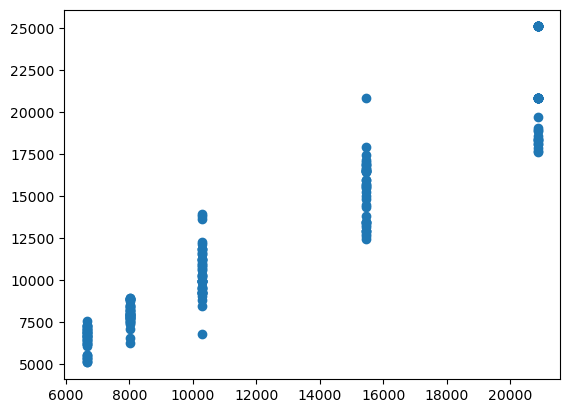

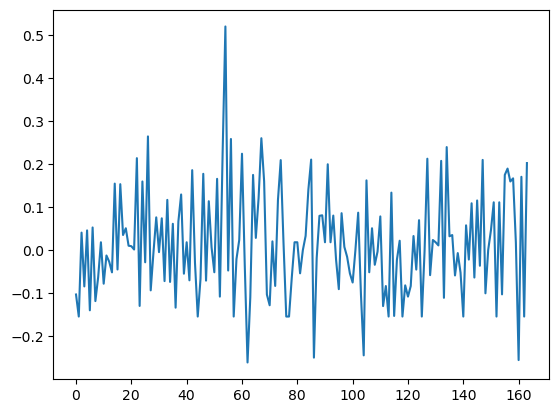

In [33]:
# 1) Linear regression with 1 feature
start = pd.concat([pd.DataFrame(),y],axis=1) # trick not to encounter an error
df1 = feasture_selection_Sia(start)    # feature selection
res1 = Linear_Reg(*spilit_scale(df1));              
plt.plot(df['curbweight'], y, "o");plt.show()
a,b,c,d = spilit_scale(df1); plt.plot(np.array(res1)/np.array(c));plt.show() # relative error plot
# The trend betwenn y and 'curbweight' is visible! 
# The training residuals is plotted too.

selected feature is:  peakrpm 			  correlation with Residuals:  0.32

      features       VIF
0     peakrpm  9.262805
1  curbweight  9.262805 


Mean Absoulut Residuals 1216.6010284809288
MAPE for training & test sets are as follow:	 0.903 0.921
R2 train: 0.91667 	 R2 test: 0.9432 	 Adjusted R2 train:  0.912 	 Adjusted R2 test:  0.94
Intercept:  12389.91 		 Coefficients:  [ 813.61 4828.35] 		


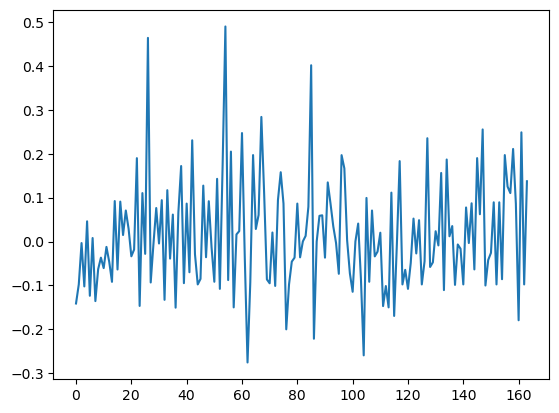

In [34]:
# Linear regression with 2 feature
# in Sia method: second feature is the most correlated feature with residuals of first model

df2 = feasture_selection_Sia(df1,df,res1, vif_=True)
res2 = Linear_Reg(*spilit_scale(df2))
a,b,c,d = spilit_scale(df2); plt.plot(np.array(res2)/np.array(c));plt.show() # relative error plot


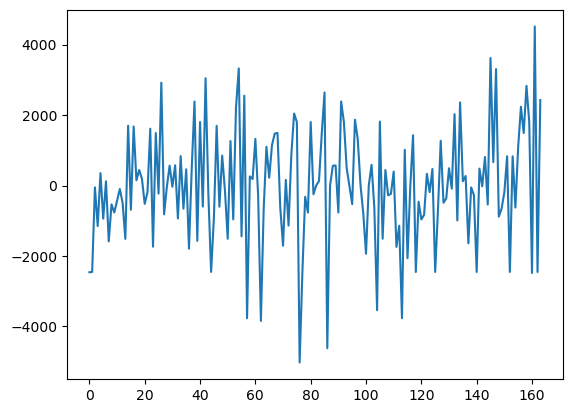

selected feature is:  compressionratio 			  correlation with Residuals:  0.25

            features        VIF
0  compressionratio  15.672572
1           peakrpm  11.728266
2        curbweight  14.610809 


Mean Absoulut Residuals 1104.6758004370806
MAPE for training & test sets are as follow:	 0.909 0.915
R2 train: 0.92758 	 R2 test: 0.94555 	 Adjusted R2 train:  0.922 	 Adjusted R2 test:  0.941
Intercept:  12389.91 		 Coefficients:  [ 833.73  778.19 4251.64] 		


In [35]:
# Linear regression with 3 feature
# in Sia method: 3rd feature is the most correlated feature with residuals of second model
plt.plot(np.array(res2));plt.show()
df3 = feasture_selection_Sia(df2,df,res2, vif_=True)
res3 = Linear_Reg(*spilit_scale(df3));  

In [36]:
# 3.1) modeling with  4 to 10 features and finally with all features (Sia filter feature selection method)
# adding more features is not usfeull and we already knew that via VIF! Hhowever the following proof it.

# Linear regression with 4 features
df4 = feasture_selection_Sia(df3,df,res3)
res4 = Linear_Reg(*spilit_scale(df4)); print()

# Linear regression with 5 features
df5= feasture_selection_Sia(df4,df,res4)
res5 = Linear_Reg(*spilit_scale(df5));  print()

# Linear regression with 6 features
df6= feasture_selection_Sia(df5,df,res5)
res6 = Linear_Reg(*spilit_scale(df6)); print()

# Linear regression with 7 features
df7= feasture_selection_Sia(df6,df,res6)
res7 = Linear_Reg(*spilit_scale(df7)); print()

# Linear regression with 8 features
df8= feasture_selection_Sia(df7,df,res7)
res8 = Linear_Reg(*spilit_scale(df8)); print()

# Linear regression with 9 features
df9 = feasture_selection_Sia(df8,df,res8)
res9 = Linear_Reg(*spilit_scale(df9)); print()

# Linear regression with 10 features
df10 = feasture_selection_Sia(df9,df,res9)
res10 = Linear_Reg(*spilit_scale(df10)); print()

# Linear regression with 10 features
res_all = Linear_Reg(*spilit_scale(df)); print()

selected feature is:  citympg 			  correlation with Residuals:  0.22

Mean Absoulut Residuals 1027.9886784594366
MAPE for training & test sets are as follow:	 0.916 0.921
R2 train: 0.9388 	 R2 test: 0.95455 	 Adjusted R2 train:  0.932 	 Adjusted R2 test:  0.95
Intercept:  12389.91 		 Coefficients:  [1054.11  727.59  836.74 3425.01] 		

selected feature is:  carbody 			  correlation with Residuals:  0.14

Mean Absoulut Residuals 1025.9595013767419
MAPE for training & test sets are as follow:	 0.916 0.926
R2 train: 0.94024 	 R2 test: 0.95786 	 Adjusted R2 train:  0.932 	 Adjusted R2 test:  0.952
Intercept:  12389.91 		 Coefficients:  [ 231.16 1094.34  700.6   779.18 3368.66] 		

selected feature is:  CarName 			  correlation with Residuals:  0.11

Mean Absoulut Residuals 1020.7025961643329
MAPE for training & test sets are as follow:	 0.916 0.925
R2 train: 0.94549 	 R2 test: 0.95799 	 Adjusted R2 train:  0.936 	 Adjusted R2 test:  0.951
Intercept:  12389.91 		 Coefficients:  [1049.    17

In [37]:
cor_filter_based_FS_method=Linear_Reg(*spilit_scale(df[["curbweight",'horsepower', "CarName", "enginesize","price"]]))

Mean Absoulut Residuals 1079.3842575150893
MAPE for training & test sets are as follow:	 0.916 0.916
R2 train: 0.93275 	 R2 test: 0.95363 	 Adjusted R2 train:  0.925 	 Adjusted R2 test:  0.948
Intercept:  12389.91 		 Coefficients:  [2350.56  771.38 1449.21  994.2 ] 		


# 3.B) reports    

# report
The result of 1 to 10 feature based on my feature selection approach with sklearn Linear regression is represented.


If we need result that is interpretable we should consider multicolinearity and avoid choosing features that are correlated. From that point of view; df2 includes the best featues with "curbweight" and "peakrpm" as selected features.
The result shows less than 8 percent relative error 92.1 percent fitness.  Adjusted R2 for trianing and test sets are 0.91 and 0.94 respectively.


# 4) comparing section

# 4.A) compare sklearn with ols from statsmodels.api
be care full that the OLS from statsmodels.api is not exactly the same as LinearRegression sklearn and the results are different. For example we can reach 0.99 Adjusted R2 with statsmodels but 90% with the same data with sklearn. All other simulations and scores here are done with sklearn. I will write from scratch to check with both in near feature.

In [38]:
X_train, X_test, y_train, y_test = train_test_split( X[["enginesize",'curbweight', 'peakrpm'] ],y, train_size=0.8, random_state=42)
ols_model = sm.OLS(y_train, X_train).fit()
ynewpred = ols_model.predict(X_test)  

print(ols_model.summary(), "\n R2 sqare for test set: ", r2_score(y_test, ynewpred))
Linear_Reg(X_train, X_test, y_train, y_test)


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              4158.
Date:                Fri, 21 Jul 2023   Prob (F-statistic):                   2.99e-152
Time:                        00:39:11   Log-Likelihood:                         -1435.9
No. Observations:                 164   AIC:                                      2878.
Df Residuals:                     161   BIC:                                      2887.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

66     2836.623814
111     -16.410523
153    -504.899963
96      333.304455
38     1100.565732
          ...     
106    1002.996495
14     2274.041463
92       13.489447
179    -434.410523
102    1164.589477
Name: price, Length: 164, dtype: float64

# 4.B) comparing my approach with filtering with correlation
To illustrat the power of feature selection, see the most correlated features with corrolation factor above 0.9 (they are improved in data preprocessing section): 
curbweight    0.954
horsepower    0.931
CarName       0.924
enginesize    0.922
carlength     0.916
carwidth      0.907
wheelbase     0.905
The top 5 are ["curbweight",'horsepower', "CarName", "enginesize", "carlength"]  the R2 results are good but a little  worse than my approach with ['citympg', 'compressionratio', 'peakrpm', 'curbweight'] with 95% adjusted R2 for the test set!

In [39]:
top1, top2, top3, top4, top5, target = 'curbweight', 'horsepower', 'CarName', 'enginesize', 'carlength', "price" 
df_top5 = df[[top1, top2, top3, top4, top5, target]]
df_top4 = df_top5.loc[:,df_top5.columns!=top5]
df_top3 = df_top4.loc[:,df_top4.columns!=top4]
df_top1, df_top2 = df[[top1, target]], df[[top1, top2, target]]
DF_TOP = [df_top1, df_top2, df_top3, df_top4, df_top5]

for df_top in DF_TOP:
    Linear_Reg(*spilit_scale(df_top))
    print()

# in this example it is not very visible but still u can see my feature selection is better than filtering by correlation!
# filtering is even worse if you check VIF result since they are correlated; however my approach is not optimal since 
# it deponds on initial feature selection; it can handle the remaining

Mean Absoulut Residuals 1259.3181719221081
MAPE for training & test sets are as follow:	 0.903 0.919
R2 train: 0.9021 	 R2 test: 0.9396 	 Adjusted R2 train:  0.9 	 Adjusted R2 test:  0.938
Intercept:  12389.91 		 Coefficients:  [5287.12] 		

Mean Absoulut Residuals 1182.717633361998
MAPE for training & test sets are as follow:	 0.91 0.923
R2 train: 0.9132 	 R2 test: 0.94284 	 Adjusted R2 train:  0.909 	 Adjusted R2 test:  0.94
Intercept:  12389.91 		 Coefficients:  [3692.4  1699.19] 		

Mean Absoulut Residuals 1113.5760487356376
MAPE for training & test sets are as follow:	 0.913 0.919
R2 train: 0.92841 	 R2 test: 0.95104 	 Adjusted R2 train:  0.923 	 Adjusted R2 test:  0.947
Intercept:  12389.91 		 Coefficients:  [2534.41 1315.41 1671.38] 		

Mean Absoulut Residuals 1079.3842575150893
MAPE for training & test sets are as follow:	 0.916 0.916
R2 train: 0.93275 	 R2 test: 0.95363 	 Adjusted R2 train:  0.925 	 Adjusted R2 test:  0.948
Intercept:  12389.91 		 Coefficients:  [2350.56  771.

# 5) PCA

In [40]:
# extracting 3 features with PCA
pca = decomposition.PCA(n_components=3)
Xtr_to_PCA1_o, X_te_PCA1_o, y_train_PCA1_o, y_test_PCA1_o= spilit_scale(df, test_size=0.2, scale_method ='S') # pca df
X_train_PCA1_o = pca.fit_transform(Xtr_to_PCA1_o); X_test_PCA1_o = pca.transform(X_te_PCA1_o)

#  model with 3 col extracted by PCA
xtr,xte,ytr,yte = X_train_PCA1_o, X_test_PCA1_o, y_train_PCA1_o, y_test_PCA1_o
xtr, xte = pd.DataFrame(xtr,  columns=["col1","col2","col3"]), pd.DataFrame(xte,  columns=["col1","col2","col3"])
res_PCA1 = Linear_Reg(xtr,xte,ytr,yte); print() 


Mean Absoulut Residuals 1175.814048638828
MAPE for training & test sets are as follow:	 0.899 0.902
R2 train: 0.92456 	 R2 test: 0.93666 	 Adjusted R2 train:  0.918 	 Adjusted R2 test:  0.932
Intercept:  12389.91 		 Coefficients:  [1505.3   -60.59  407.33] 		



In [41]:
# combining 3 best features of df3  with 3 PAC features
# modeling with 6 cols (combine 3 cols from df3 with 3 cols extracted by pca)  
xtr_pd, xte_pd = pd.DataFrame(xtr,  columns=["col1","col2","col3"]), pd.DataFrame(xte,  columns=["col1","col2","col3"])
xtr_n, xte_n = pd.concat([xtr_pd, spilit_scale(df3)[0]], axis =1), pd.concat([xte_pd, spilit_scale(df3)[1]], axis =1);
res_PCA1_n = Linear_Reg(xtr_n,xte_n,ytr,yte);  

# we can reach 0.96.4 accuracy using PCA

Mean Absoulut Residuals 1013.2690680852298
MAPE for training & test sets are as follow:	 0.914 0.926
R2 train: 0.94116 	 R2 test: 0.96361 	 Adjusted R2 train:  0.931 	 Adjusted R2 test:  0.957
Intercept:  12389.91 		 Coefficients:  [ 716.19   46.08  235.31  375.45  427.   2351.03] 		


In [42]:
# one beste filter approach with 3 PCA
xtr_pd, xte_pd = pd.DataFrame(xtr,  columns=["col1","col2","col3"]), pd.DataFrame(xte,  columns=["col1","col2","col3"])
xtr_n, xte_n = pd.concat([xtr_pd, spilit_scale(df1)[0]], axis =1), pd.concat([xte_pd, spilit_scale(df1)[1]], axis =1);
res_PCA1_n = Linear_Reg(xtr_n,xte_n,ytr,yte);  

Mean Absoulut Residuals 1040.986853476556
MAPE for training & test sets are as follow:	 0.913 0.925
R2 train: 0.93792 	 R2 test: 0.96398 	 Adjusted R2 train:  0.931 	 Adjusted R2 test:  0.96
Intercept:  12389.91 		 Coefficients:  [ 931.6  -110.09  351.49 2134.59] 		


In [43]:
##################################################################################################
##################################################################################################
# on feature added by sia approach TO PCA     (the best for this project)
corr_residual = max(abs(X.corrwith(res_PCA1).round(2))); corr_residual
idx_col = abs(X.corrwith(res_PCA1).round(2)).argmax(); idx_col
print("selected feature & its correlation factor with output after preprocessing\n", X.columns[idx_col], corr_residual) 
df1f_for_PCA = df[['boreratio', "price"]]

xtr_best, xte_best = pd.concat([xtr_pd, spilit_scale(df1f_for_PCA)[0]], axis =1), pd.concat([xte_pd, spilit_scale(df1f_for_PCA)[1]], axis =1);
res_3PCA1_1feature = Linear_Reg(xtr_best,xte_best,ytr,yte)
##################################################################################################
##################################################################################################

selected feature & its correlation factor with output after preprocessing
 boreratio 0.15
Mean Absoulut Residuals 1129.027829026755
MAPE for training & test sets are as follow:	 0.902 0.913
R2 train: 0.93121 	 R2 test: 0.9406 	 Adjusted R2 train:  0.924 	 Adjusted R2 test:  0.934
Intercept:  12389.91 		 Coefficients:  [1719.95  -74.31  351.36 -887.99] 		


In [44]:
# top 3 filter approach with 3 PCA
xtr_pd, xte_pd = pd.DataFrame(xtr,  columns=["col1","col2","col3"]), pd.DataFrame(xte,  columns=["col1","col2","col3"])
xtr_n, xte_n = pd.concat([xtr_pd, spilit_scale(df_top3)[0]], axis =1), pd.concat([xte_pd, spilit_scale(df_top3)[1]], axis =1);
res_PCA1_n = Linear_Reg(xtr_n,xte_n,ytr,yte);  

Mean Absoulut Residuals 1025.606000724815
MAPE for training & test sets are as follow:	 0.916 0.925
R2 train: 0.9417 	 R2 test: 0.96473 	 Adjusted R2 train:  0.931 	 Adjusted R2 test:  0.959
Intercept:  12389.91 		 Coefficients:  [ 659.04 -157.63  305.35 1677.37  669.42  828.14] 		


# 5) reoport of PCA
Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information that can be more easily visualized and analyzed. However, since it is unsupervised it is not optimal approach for regression. But combining PCA with my approach result in great scores. The result of extracating 3 feature with PCA is as follow:
model with 3 features extracted by PCA:             Adjusted R2: 0.918  0.932  & MAPE: 0.899 0.902 for training & test sets 
6 features (3 PCA + 3 df3 my approach):             Adjusted R2: 0.931  0.957  & MAPE: 0.914 0.926 for training & test sets 
4 features (3PCA + 1 df1 ) :                        Adjusted R2: 0.931  0.960  & MAPE: 0.913 0.925 for training & test sets 
4 features (3PCA + 1 updated my approach):          Adjusted R2: 0.924  0.934  & MAPE: 0.902 0.913 for training & test sets 

But what id we combine PCA with top 3 correlation filter-based feature selection method:
6 features (3 PCA + 3 top correlated):              Adjusted R2: 0.931  0.959  & MAPE: 0.916 0.925 for training & test sets 
In short:
The best approach is 3PCA + df1 that is most correlated featue with Adjusted R2: 0.931  0.960 for training and test sets with 7.25% relative error.

# 6) Robust featue selection
We could have ended the project in the previous section but what if new data have new values on categorial data that we have not seen! it is less possible in binary or near binary categorial features. on the other hand, feaures that have many categories are not trustable and we should work on them more or drop them. However, if the result are not dropped too much it is better that we choose more robust features that have less unit values in categorial data else we had to consider more preprocessing. At least we should not convert all continuos data to ordinal.


In [45]:
# here we considered less than 40 unit values
df_robust = df[[col for col in cols if len(Counter(df_original[col]))<40]]

# Linear regression with 1 feature
start = pd.concat([pd.DataFrame(),y],axis=1) # trick not to encounter an error
df1 = feasture_selection_Sia(start, df=df_robust, res=y)    # feature selection
df1.head()
res1 = Linear_Reg(*spilit_scale(df1));print()                # chera be deghate corr naresidam!!???

# Linear regression with 2 feature
# in Sia method: second feature is the most correlated feature with residuals of first model
df2 = feasture_selection_Sia(df1, df=df_robust, res=res1)
res2 = Linear_Reg(*spilit_scale(df2));  print() 

# Linear regression with 3 feature
# in Sia method: 3rd feature is the most correlated feature with residuals of second model
df3 = feasture_selection_Sia(df2,res=res2, df=df_robust)
res3 = Linear_Reg(*spilit_scale(df3));  print() 

df4 = feasture_selection_Sia(df3,res=res3, df=df_robust)
res4 = Linear_Reg(*spilit_scale(df4)); print()

# Linear regression with 5 features
df5= feasture_selection_Sia(df4,res=res4, df=df_robust)
res5 = Linear_Reg(*spilit_scale(df5));  print()

# Linear regression with 6 features
df6= feasture_selection_Sia(df5,res=res5, df=df_robust)
res6 = Linear_Reg(*spilit_scale(df6)); print()

selected feature is:  highwaympg 			  correlation with Residuals:  0.86

Mean Absoulut Residuals 2075.4285138422024
MAPE for training & test sets are as follow:	 0.832 0.845
R2 train: 0.73246 	 R2 test: 0.76655 	 Adjusted R2 train:  0.726 	 Adjusted R2 test:  0.761
Intercept:  12389.91 		 Coefficients:  [4764.14] 		

selected feature is:  peakrpm 			  correlation with Residuals:  0.46

Mean Absoulut Residuals 1749.65249430793
MAPE for training & test sets are as follow:	 0.851 0.856
R2 train: 0.80529 	 R2 test: 0.82171 	 Adjusted R2 train:  0.795 	 Adjusted R2 test:  0.812
Intercept:  12389.91 		 Coefficients:  [1694.6  3980.05] 		

selected feature is:  compressionratio 			  correlation with Residuals:  0.42

Mean Absoulut Residuals 1569.786567642255
MAPE for training & test sets are as follow:	 0.864 0.857
R2 train: 0.86344 	 R2 test: 0.86915 	 Adjusted R2 train:  0.852 	 Adjusted R2 test:  0.859
Intercept:  12389.91 		 Coefficients:  [1740.8  1366.16 3062.57] 		

selected feature is

In [46]:
# if want to choose more robust features the result will be unacceptable
df_robust = df[[col for col in cols if len(Counter(df_original[col]))<15]] 
# Linear regression with 1 feature
start = pd.concat([pd.DataFrame(),y],axis=1) # trick not to encounter an error
df1 = feasture_selection_Sia(start, df=df_robust, res=y)    # feature selection
df1.head()
res1 = Linear_Reg(*spilit_scale(df1));print()                # chera be deghate corr naresidam!!???

# Linear regression with 2 feature
# in Sia method: second feature is the most correlated feature with residuals of first model
df2 = feasture_selection_Sia(df1, df=df_robust, res=res1)
res2 = Linear_Reg(*spilit_scale(df2));  print() 

# Linear regression with 3 feature
# in Sia method: 3rd feature is the most correlated feature with residuals of second model
df3 = feasture_selection_Sia(df2,res=res2, df=df_robust)
res3 = Linear_Reg(*spilit_scale(df3));  print() 

selected feature is:  drivewheel 			  correlation with Residuals:  0.69

Mean Absoulut Residuals 3088.19869866034
MAPE for training & test sets are as follow:	 0.725 0.699
R2 train: 0.48113 	 R2 test: 0.47471 	 Adjusted R2 train:  0.468 	 Adjusted R2 test:  0.461
Intercept:  12389.91 		 Coefficients:  [3861.21] 		

selected feature is:  fuelsystem 			  correlation with Residuals:  0.44

Mean Absoulut Residuals 2544.6256410098486
MAPE for training & test sets are as follow:	 0.785 0.764
R2 train: 0.62287 	 R2 test: 0.62878 	 Adjusted R2 train:  0.603 	 Adjusted R2 test:  0.609
Intercept:  12389.91 		 Coefficients:  [2484.12 2527.55] 		

selected feature is:  symboling 			  correlation with Residuals:  0.26

Mean Absoulut Residuals 2432.7048033044834
MAPE for training & test sets are as follow:	 0.801 0.786
R2 train: 0.65477 	 R2 test: 0.61889 	 Adjusted R2 train:  0.627 	 Adjusted R2 test:  0.588
Intercept:  12389.91 		 Coefficients:  [1092.05 2236.96 2259.49] 		



In [47]:
# for solving to achieve more robust data we need more preprocessing on data
# for example join all types of one company in CarName together
# here I add one featue that has a countinuos meaningful value to improve the result


df_robust = df[[col for col in cols if len(Counter(df_original[col]))<8]]
# Linear regression with 1 feature
start = pd.concat([df["enginesize"],y],axis=1) # trick not to encounter an error
df1 = feasture_selection_Sia(start, df=df_robust, res=y)    # feature selection
df1.head()
res1 = Linear_Reg(*spilit_scale(df1));print()                # chera be deghate corr naresidam!!???

# Linear regression with 2 feature
# in Sia method: second feature is the most correlated feature with residuals of first model
df2 = feasture_selection_Sia(df1, df=df_robust, res=res1)
res2 = Linear_Reg(*spilit_scale(df2));  print() 

# Linear regression with 3 feature
# in Sia method: 3rd feature is the most correlated feature with residuals of second model
df3 = feasture_selection_Sia(df2,res=res2, df=df_robust)
res3 = Linear_Reg(*spilit_scale(df3));  print() 

selected feature is:  drivewheel 			  correlation with Residuals:  0.69

Mean Absoulut Residuals 1554.2979253213896
MAPE for training & test sets are as follow:	 0.871 0.87
R2 train: 0.86253 	 R2 test: 0.89865 	 Adjusted R2 train:  0.855 	 Adjusted R2 test:  0.893
Intercept:  12389.91 		 Coefficients:  [1177.89 4361.05] 		

selected feature is:  carbody 			  correlation with Residuals:  0.17

Mean Absoulut Residuals 1528.0651263670304
MAPE for training & test sets are as follow:	 0.872 0.873
R2 train: 0.86727 	 R2 test: 0.90557 	 Adjusted R2 train:  0.857 	 Adjusted R2 test:  0.898
Intercept:  12389.91 		 Coefficients:  [ 407.25 1096.64 4288.61] 		

selected feature is:  enginetype 			  correlation with Residuals:  0.07

Mean Absoulut Residuals 1523.42162049818
MAPE for training & test sets are as follow:	 0.872 0.872
R2 train: 0.86806 	 R2 test: 0.90792 	 Adjusted R2 train:  0.853 	 Adjusted R2 test:  0.898
Intercept:  12389.91 		 Coefficients:  [ 179.76  426.79 1041.54 4240.48] 		



# 7) conclusion

The assignment of Tehran University must be done with linear regression. A new Feature selection algorithm by myself is presented to reach better result and PCA applied to extract new features and combined with other features. Although even exhaustive feature selection is not optimal for all algorithm, a new suboptimal feature selection method described. Linear regression from sklearn and ols from statsmodels.api are compared and finally robust feature selection is explained.
The best resul of test set with Adjusted R2 metric for statsmodels and  sklearn were 0.99 and 0.96 respectively.